<div align="center"><h1>Between Flexibility and Universality</h1>
<h3>Combining TAGML and XML to Enhance the Modeling of Cultural Heritage Text</h3>
<br/>
<h4>Elli Bleeker, Bram Buitendijk, Ronald Haentjens Dekker
    <br/> ---
    <br/>R&amp;D group, Royal Netherlands Academy of Arts and Sciences - Humanities Cluster</h4>
    <h6>Computational Humanities Research workshop, November 18-20, 2020</h6>
    <img align="right" width="100" height="100" src="images/logo-huc.png">
    <br/>
    <img align="right" width="100" height="100" src="images/CC-BY_icon.svg.png">
</div>

The background / context of our research: digital scholarly editing and TAG

# Scholarly editing in the 2020s

## #goals:

- Modeling cultural heritage texts from different research perspectives
- Modeling overlapping, nonlinear or discontinuous structures;
- Easy exchange / reuse of TEI-encoded text files;
- Digital edition as a flexible research environment.

# Text-As-Graph (TAG) 

- Under development since 2017 at the R&D group of the Royal Netherlands Academy of Arts and Sciences
- Datamodel: Multi-Colored Trees (MCT)
- Reference implementation: _Alexandria_ (executes on the command line)
- Syntax: TAGML

### Research question
How can we effectively support _and advance_ the research of a scholarly editor using computational methods?

What aspects of the research can be automated, and what aspects will continue to require human input?

### Approach
1. Model the editorial workflow as a computational pipeline;
2. Focus on handling individual steps rather than supplying for the whole pipeline at once;
3. Decide whether a step can be automated or whether editorial (human) input is required

# 1. Conceptual workflow of the scholarly editor

Visualization of the workflow of a digital scholarly editor, illustrating how the intellectual activitiesof the editor (upper row) affect their actions (middle row) and the output of these actions (lower row):

<img src="images/CHR2020-conceptual-workflow.png">

We focus on the encodingstep, showing how TAG allows for the encoding of multiple, co-existing research perspectives on the source text, and on how these encoded documents can be exported to XML for analysis or publication:

<img src="images/CHR2020-conceptual-workflow_2.png">

# 2. Workflow component: encoding

How can scholarly editors model a text from different research perspectives, producing a result that can be easily repurposed?

What we propose can be considered "the best of both worlds": TAGML offers the most **flexibility** in text modeling; while XML offers the **universality** in that most text analysis and publication tools accept XML as input format. 

### "Flexible" 
TAGML to model the text as a hypergraph, supporting overlapping, nonlinear and discontinuous structures

### "Universal"
User-guided TAGML to XML export

##  TAGML

### Layers
- Sets of markup elements;
- Markup elements are hierarchically ordered within each layer;
- Layers can overlap

### Views
- JSON documents describing which markup elements and/or layers to show;
- Filter the information from a TAGML document 

## Example

### Source text
- Documentary perspective: lines on a typescript
- Textual perspective: sentences in a ministery report.
<br/>
<img src="images/min-ez-1954-fragment.png">
<br/>
Source: minutes of the ministry of Economic Affairs about emigration, 1954. Located in the Dutch National Archive.

### Encoded TAGML transcription
<br/>
<img src="images/tagml-minez-fragment-1954.png">

- `l` elements to represent the lines on the document
- `s` element to represent the sentences in the text
- overlapping structures handled with two layers: layer `A` and layer `B`
<br/>

In [1]:
%use tag
val tokens = TAG.tokenize(Paths.get("tag-for-CHR2.tagml"))
tokens.joinToString("\n")

Welcome to TAG
Using GraphViz: dot - graphviz version 2.44.1 (20200629.0846)



Range{1:1 - 16:4} [!{":ontology":{"root":"tagml","elements":{"tagml":{"description":"root element and selected syntax"},"l":{"description":"line on document pages"},"s":{"description":"sentence in text"}}}}!]
Range{18:1 - 18:14} [tagml|+A,+B>
Range{18:14 - 18:19} [l|A>
Range{18:19 - 18:24} [s|B>
Range{18:24 - 18:59} Het is duidelijk, dat de onder deze
Range{18:59 - 18:62} <l]
Range{18:62 - 18:67} [l|A>
Range{18:67 - 18:118} aantallen vallende beroepsbeoefenaren niet alle als
Range{18:118 - 18:121} <l]
Range{18:121 - 18:126} [l|A>
Range{18:126 - 18:170} "moeilijk misbaar" kunnen worden aangemerkt.
Range{18:170 - 18:173} <s]
Range{18:173 - 18:176} <l]
Range{18:176 - 18:183} <tagml]
Range{18:176 - 18:183} <tagml]

Let's take a look at the MCT of the text, which clearly shows the two overlapping hierarchies of layer A and layer B:

### MCT of the encoded source text

Markup(tagml|A, B)
Markup(l|A)
Markup(s|B)
Text(Het is duidelijk, dat de onder deze)
Markup(l|A)
Text(aantallen vallende beroepsbeoefenaren niet alle als)
Markup(l|A)
Text("moeilijk misbaar" kunnen worden aangemerkt.)


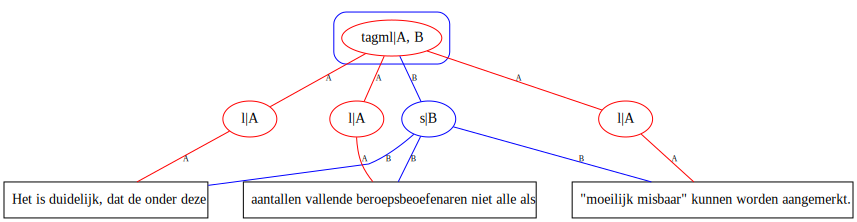

In [7]:
val mct = tokens.asMCT()
mct.nodes.forEach{println(it)}
mct.show()

# 3. Exporting TAGML to XML with user-input

## TAGML-to-XML export

Converting TAGML to XML implies converting a Multi-Colored Tree with (potentially) overlapping structures to a single-rooted tree.

<img src="images/tagml-to-xml-export.png">

The XML document will have one leading hierarchy; the markup elements not belonging to that hierarchy are expressed as Trojan Horse milestone elements.

The user decides which hierarchy will be leading.

**[[switch to demo in alexandria]]**

<img src="images/TAG-to-XML-export-detail.png">

# Future work
1. TAGML autocomplete and validation in the Sublime editor
2. TAGML header to XML header (again: user-guided)
3. Remote repository to enable collaboration

# Recap

- Editorial workflow is conceptualized as a computational pipeline;
- Components of the pipeline are addressed individually, for example:
    - Cultural heritage texts are **encoded** in TAGML and **exported** to XML;
- Editors can guide the export process to fit their research interests:
    - What to filter out, what information to keep, which hierarchy is leading?
    - Selected elements that do not belong to the leading hierarchy are transformed into Trojan Horse milestone elements

# More information:

- mail us! 
- check out the TAG website: https://huygensing.github.io/TAG/
- take a look at our previous presentations / papers: https://github.com/HuygensING/TAG#presentations-and-publications